**How Old is this Abalone?: Predicting the Age of Abalone Based on Physical Measurements**


**Introduction**

Abalone is a type of marine snail that is highly cherished for its meat and shells. Its meat is a delicacy that is among one of the most expensive seafood in the world, while its shells are best used for jewelry and decorative objects. Determining the age of abalone is crucial for sustainable harvesting and our project aims to analyze a dataset on abalone characteristics to develop a predictive model for estimating their age. By identifying key characteristics that correlate with age, we can contribute helpful information to resource management and also broaden our knowledge of abalone population dynamics. The question we will be attempting to answer is, "can we accurately predict the age of abalone based on their physical features"? The dataset used for this project contains numerous physical measurements such as their length, diameter, and number of rings. It contains 9 different features (columns) and 4,177 instances (rows) of data about various abalones. The age of the abalone is determined by the rings formed inside its inner shell. However, since some rings are hard to see even under a microscope, adding 1.5 to its ring counts is traditionally accepted when measuring the age, our target variable. This dataset offers a valuable resource for evaluating the relationship between abalone characteristics and their age.

**Preliminary Data Analysis**

In [1]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#url_file <- "https://raw.githubusercontent.com/joycecoww/dsci100-proj-group62/main/abalone.csv?token=GHSAT0AAAAAACDJUG7ETHNXZGLIYRHD7Q32ZECJ25Q"
abalone <- read_csv(file = "abalone.csv")

colnames(abalone) <- make.names(colnames(abalone))
abalone

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Sex
dbl (8): Length, Diameter, Height, Whole weight, Shucked weight, Viscera wei...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [3]:
abalone <- mutate(abalone, Age = Rings + 1.5)
abalone

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9,10.5
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10,11.5
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


In [4]:
set.seed(2000) #don't know if this is the right seed or if we even need one?
abalone_split <- initial_split(abalone, prop = 0.75, strata = Age)  
abalone_train <- training(abalone_split)   
abalone_test <- testing(abalone_split)
abalone_train
abalone_test

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
M,0.465,0.355,0.105,0.4795,0.2270,0.1240,0.125,8,9.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.655,0.525,0.180,1.4020,0.6240,0.2935,0.365,13,14.5
F,0.655,0.500,0.220,1.3590,0.6420,0.3255,0.405,13,14.5
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.500,0.380,0.125,0.5770,0.269,0.1265,0.1535,9,10.5
M,0.590,0.440,0.135,0.9660,0.439,0.2145,0.2605,10,11.5
F,0.625,0.485,0.150,1.0945,0.531,0.2610,0.2960,10,11.5


In [5]:
summarized_abalone_train <- abalone_train %>%
  group_by(Age) %>%
  summarise(
    Num_observations = n(),
    Mean_Length = mean(Length, na.rm = TRUE),
    Mean_Diameter = mean(Diameter, na.rm = TRUE),
    Mean_Height = mean(Height, na.rm = TRUE),  
    Mean_Whole.weight = mean(Whole.weight, na.rm = TRUE),
    Mean_Shucked.weight = mean(Shucked.weight, na.rm = TRUE),
    Mean_Viscera.weight = mean(Viscera.weight, na.rm = TRUE),
    Mean_Shell.weight = mean(Shell.weight, na.rm = TRUE),
    Mean_Rings = mean(Rings, na.rm = TRUE),
    
      
    Missing_Data_Count = sum(is.na(Length) | is.na(Diameter) | is.na(Height)| is.na(Whole.weight)|is.na(Shucked.weight)|
    is.na(Viscera.weight)|is.na(Shell.weight)|is.na(Rings))
    ) %>%
  ungroup() %>%
  mutate(Class = ifelse(is.na(Age), "Total", Age))

summarized_abalone_train

Age,Num_observations,Mean_Length,Mean_Diameter,Mean_Height,Mean_Whole.weight,Mean_Shucked.weight,Mean_Viscera.weight,Mean_Shell.weight,Mean_Rings,Missing_Data_Count,Class
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2.5,1,0.0750000,0.0550000,0.01000000,0.00200000,0.00100000,5e-04,0.001500000,1,0,2.5
3.5,1,0.1500000,0.1000000,0.02500000,0.01500000,0.00450000,4e-03,0.005000000,2,0,3.5
4.5,9,0.1755556,0.1277778,0.04055556,0.02655556,0.01072222,6e-03,0.008333333,3,0,4.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26.5,1,0.6450,0.490,0.2150,1.4060,0.4265,0.2285,0.510,25,0,26.5
28.5,2,0.6075,0.500,0.2025,1.6980,0.5390,0.2980,0.705,27,0,28.5
30.5,1,0.7000,0.585,0.1850,1.8075,0.7055,0.3215,0.475,29,0,30.5


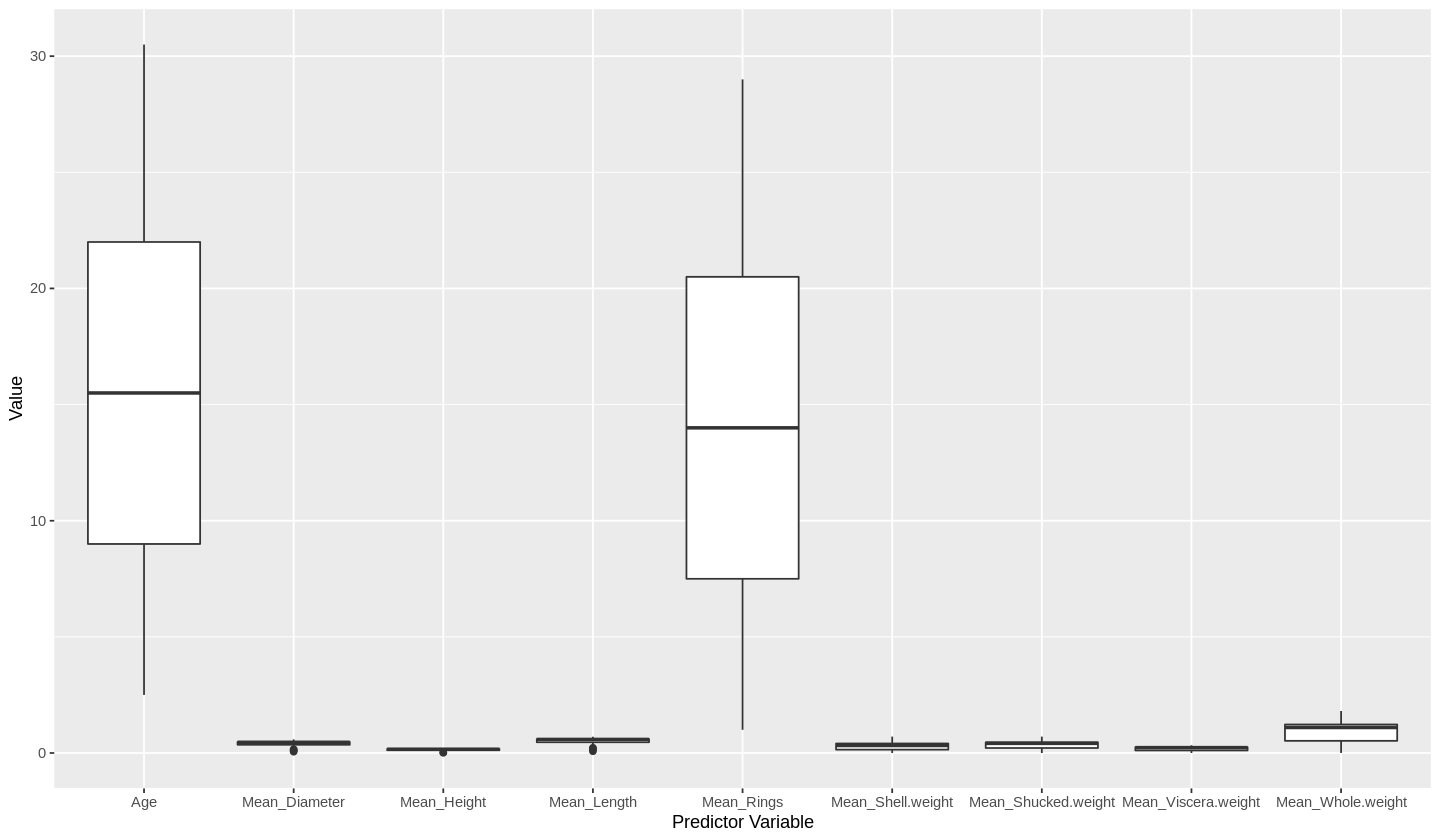

In [6]:
summarized_long <- summarized_abalone_train |>
   pivot_longer(cols = -c(Num_observations, Missing_Data_Count, Class), 
    names_to = "variable",
    values_to = "value") 
    

options(repr.plot.width = 12, repr.plot.height = 7)

summarized_plot <- summarized_long |>
    ggplot(aes(x = variable, y = value))+
    geom_boxplot()+
    labs(x = "Predictor Variable", y = "Value")
  
summarized_plot

**Methods**

For the data analysis, we will use a subset of the available predictor variables that are likely to be informative for age prediction. These variables will be selected based on their potential relevance and significance in determining abalone age. Attributes such as shell length, diameter, and whole weight are commonly associated with age and will be considered.

To predict the age of abalone, we will use a linear regression model. This model will be trained on the data provided in the abalone dataset using techniques like cross-validation to evaluate its performance. 
We will create a scatterplot of the predicted age versus the actual age of the abalones to help us visualize the results. This plot will help us visually assess how accurately the model was able to predict abalone age. 


**Expected Outcomes and Significance**

We expect to be able to predict the age of abalones with a high level of accuracy, based on various physical descriptors provided by the dataset, such as shell measurements and weight. This information could potentially be very useful to improve resource management and conservation practices. This information could also help determine sustainable harvesting quotas and understand abalone population dynamics while contributing to the field of abalone biology and conservation as a whole. The regression analysis performed on this dataset could also lead to further research such as investigating the impact of various environmental factors on abalone growth rates or exploring a relationship between abalone age and meat quality.
